## PCA 梯度上升

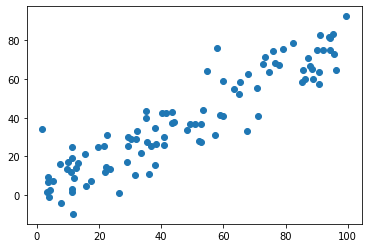

In [1]:
import numpy as np
import  matplotlib.pyplot as plt

X = np.empty((100,2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3.0 + np.random.normal(0, 10, size=100)

plt.scatter(X[:, 0], X[:, 1])
plt.show()


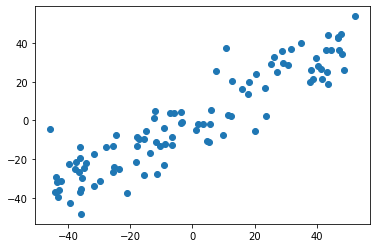

In [2]:
def demean(X):
    return X - np.mean(X, axis=0)

X_demean = demean(X)

plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.show()

In [3]:
def f(X, w):
    return np.sum((X.dot(w)**2)) / len(X)

def df_math(X, w):
    return X.T.dot(X.dot(w)) *2/len(X)

def df_debug(X, w, epsilon=1e-10):
    ret = np.empty(len(w))
    for i in range(len(w)):
        w_copy1 = w.copy()
        w_copy2 = w.copy()
        w_copy1[i] += epsilon
        w_copy2[i] -= epsilon
        ret[i] = (f(X, w_copy1) - f(X, w_copy2)) / (2 * epsilon)
    return ret

def gradient_ascent(X, initial_w, df, eta=1e-3, n_iters=1e4, epsilon=1e-8):
    def directional(w):
        return w / np.linalg.norm(w)
    w = initial_w
    iter_cnt = 0
    while iter_cnt < n_iters:
        w = directional(w)
        last_w = w
        w = w + eta * df(X, w)
        w = directional(w)
        if abs(f(X, w) - f(X, last_w)) < epsilon:
            break
        iter_cnt += 1
    return w

In [4]:
initial_w = np.random.random(X.shape[1])
w = gradient_ascent(X_demean, initial_w, df_debug)
w

array([0.76678906, 0.64189917])